# Лабораторная работа №1
## по дисциплине "Системы искусственного интеллекта"
### БВТ2101 Юдин Артём

Лабораторная работа посвящена работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib.
Для выполнения работы вам был предоставлен набор данных, содержащий информацию об атлетах, принявших участие в Летних Олимпийских играх 2024 в Париже.
Описание каждой колоноки в наборе данных приведено дальше.

code - код спортсмена;

name - полное имя спортсмена;

name_short - сокращенное имя;

name_tv - имя, отображаемое в эфире;

gender - пол спортсмена;

function - роль на олимпиаде;

country_code - код страны;

country - название страны;

country_full - полное название страны;

nationality - сокращенная национальность спортсмена;

nationality_full - полная национальность;

nationality_code - код национальности;

height - рост;

weight - вес;

disciplines - дисциплины, в которых принимает участие спортсмен;

events - состязания, в которых участвует спортсмен;

birth_date - дата рождения спортсмена.


Импортируйте необходимые библиотеки.

Загрузите набор данных из csv-файла. Выведите информацию обо всех колонках, количестве данных в наборе и их статистических показателях (среднее, медиана и т.д.).

In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from dateutil.relativedelta import relativedelta

df = pl.read_csv("./athletes new.csv")
df.describe()

statistic,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
str,f64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,str,str
"""count""",11115.0,"""11115""","""11115""","""11115""","""11115""","""11115""","""11115""","""11115""","""11115""","""11115""","""11115""","""11115""",11115.0,11099.0,"""11115""","""11115""","""11115"""
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,16.0,"""0""","""0""","""0"""
"""mean""",1.8874e6,null,null,null,null,null,null,null,null,null,null,null,81.835178,2.213713,null,null,null
"""std""",358768.65811,null,null,null,null,null,null,null,null,null,null,null,89.504711,13.114771,null,null,null
"""min""",1.532872e6,"""671""","""671""","""671""","""Female""","""Alternate Athlete""","""AFG""","""AIN""","""AIN""","""0""","""0""","""0""",0.0,0.0,"""['3x3 Basketball', 'Basketball…","""[""Lightweight Men's Double Scu…","""1954-12-01"""
"""25%""",1.888188e6,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,null,null,null
"""50%""",1.918842e6,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,null,null,null
"""75%""",1.94895e6,null,null,null,null,null,null,null,null,null,null,null,177.0,0.0,null,null,null
"""max""",9.460001e6,"""von MARTELS Chris""","""von MARTELS C""","""van Vinh TRINH""","""Male""","""Athlete""","""ZIM""","""Zimbabwe""","""Zimbabwe""","""Zimbabwe""","""Zimbabwe""","""ZIM""",222.0,113.0,"""['Wrestling']""","""['Women']""","""2012-08-11"""


Проверьте наличие пропусков в данных и заполните их, выбрав стратегию работы с пропусками.

In [37]:
df = df.with_columns(pl.col("weight")
       .fill_null(strategy='mean')
       .alias("weight"))

df.select(pl.col('weight')).null_count()

weight
u32
0


Удалите колонки code, name_short, name_tv

In [38]:
df = df.drop(["code","name_short","name_tv"])
df.head()

name,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
str,str,str,str,str,str,str,str,str,i64,f64,str,str,str
"""VALENCIA Alejandra""","""Female""","""Athlete""","""MEX""","""Mexico""","""Mexico""","""Mexico""","""Mexico""","""MEX""",0,0.0,"""['Archery']""","""[""Women's Individual"", ""Women'…","""1994-10-17"""
"""RUIZ Angela""","""Female""","""Athlete""","""MEX""","""Mexico""","""Mexico""","""Mexico""","""Mexico""","""MEX""",0,0.0,"""['Archery']""","""[""Women's Individual"", ""Women'…","""2006-07-28"""
"""GRANDE Matias""","""Male""","""Athlete""","""MEX""","""Mexico""","""Mexico""","""Mexico""","""Mexico""","""MEX""",0,0.0,"""['Archery']""","""[""Men's Individual"", ""Men's Te…","""2004-04-26"""
"""ROJAS Carlos""","""Male""","""Athlete""","""MEX""","""Mexico""","""Mexico""","""Mexico""","""Mexico""","""MEX""",0,0.0,"""['Archery']""","""[""Men's Individual"", ""Men's Te…","""2000-01-14"""
"""MARTINEZ WING Bruno""","""Male""","""Athlete""","""MEX""","""Mexico""","""Mexico""","""Mexico""","""Mexico""","""MEX""",0,0.0,"""['Archery']""","""[""Men's Individual"", ""Men's Te…","""1998-03-08"""


Из какой страны было больше всего атлетов? Сколько их было?

In [39]:
country_df = df.group_by("country").len().sort("len",descending=True)

print(f"from {country_df['country'].to_list()[0]},\
 there were {country_df['len'].to_list()[0]} athletes")

from United States, there were 620 athletes


Найдите 15 стран, из которых было больше всего спортсменов. Постройте гистограмму, где по горизонтальной оси будет отображаться код страны, а по вертикальной - количество спортсменов.

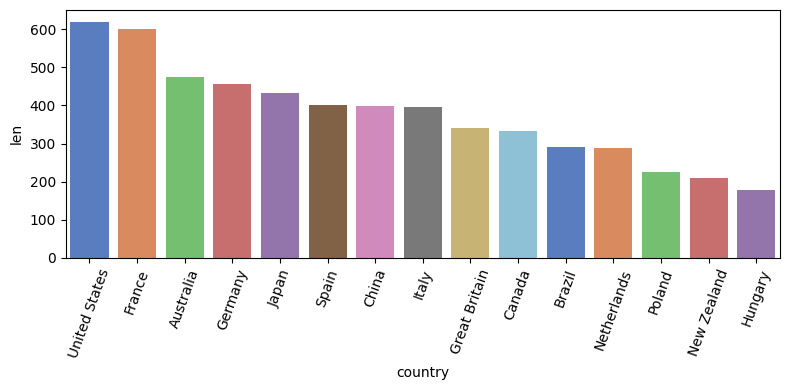

In [40]:
plt.figure(figsize=(8,4))
sns.barplot(x=country_df[:15]['country'], 
            y=country_df[:15]['len'], 
            hue=country_df[:15]['country'],
            palette="muted")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

Сколько женщин и мужчин участвовало в Олимпиаде?

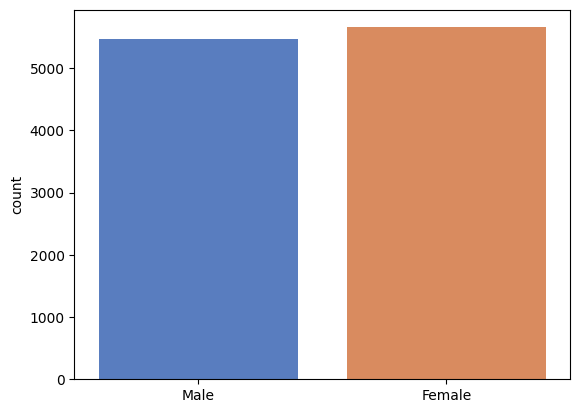

In [41]:
sns.barplot(x=np.array(["Male", "Female"]), 
            y=df['gender'].value_counts()['count'], 
            hue=np.array(["Male", "Female"]),
            palette="muted")
plt.show()

Выведите количество женщин, которые участвовали только в одной соревновательной группе (колонка events).

In [42]:
fem_df = df.filter(pl.col("gender").eq("Female"))
el = fem_df.with_columns(
    pl.col("events").map_elements(lambda x: len(eval(x)), return_dtype=int).alias('events_len')
)
print(f"{sum(el['events_len'] == 1)} took part in only one event")

4280 took part in only one event


Выведите количество спортсменов, у которых национальность не совпадает со страной, за которую они выступают.

In [43]:
print(f"{sum(df['country_full'].ne(df['nationality_full']))} not from their nationality country")

203 not from their nationality country


Какой процент мужчин моложе 23 участвовало в этой Олимпиаде?

In [44]:
df = df.with_columns(
    pl.col("birth_date").str.to_date().alias("birth_date")
)

male_df = df.filter(pl.col("gender").eq("Male"))
days = (datetime.datetime.strptime('2024-07-26', "%Y-%m-%d").date() - male_df["birth_date"]).to_list()
years = [(day // 365).days for day in days]
print(f"{(sum(1 for year in years if year < 23) / 5655):.4f} male younger than 23")

0.2050 male younger than 23


Постройте график зависимости роста от веса у женщин (scatter plot).

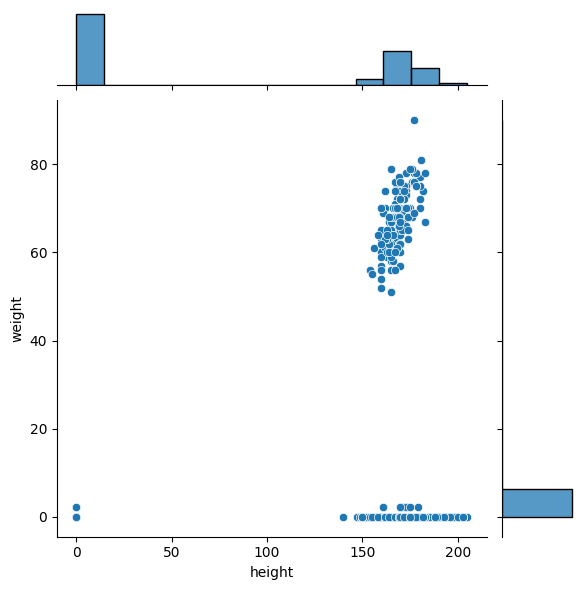

In [45]:
sns.jointplot(x="height", y="weight", data=fem_df)
plt.show()

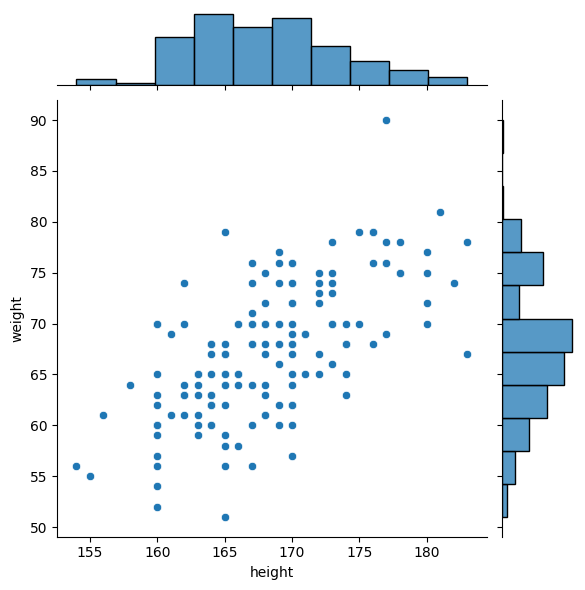

In [46]:
cutted_fem_df = fem_df.filter((pl.col("weight") > 10) & (pl.col("height") > 1))
sns.jointplot(x="height", y="weight", data=cutted_fem_df)
plt.show()

Постройте график распределения, где по оси X будет показан возраст, а по оси Y - процент спортсменов этого возраста, принявших участие в Олимпиаде для женщин и мужчин на одном графике.

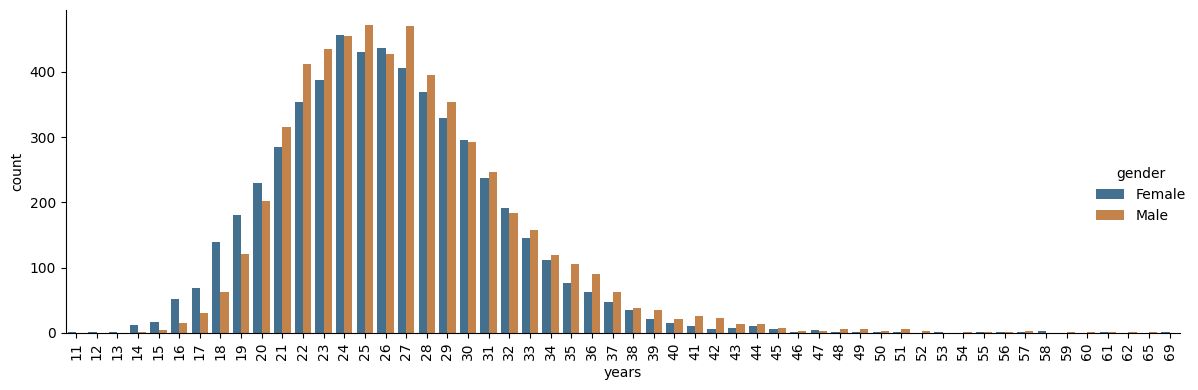

In [47]:
df = df.with_columns(
    pl.col("birth_date")
    .map_elements(lambda x: relativedelta(datetime.datetime.strptime('2024-07-26', "%Y-%m-%d").date(), x).years, return_dtype=int)
    .alias('years')
)

sns.catplot(data=df,
            hue='gender', 
            x='years', 
            kind='count', 
            saturation=0.5
).figure.set_size_inches(12,4)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Постройте круговую диаграмму, чтобы отобразить долю спортсменов по пяти странам с наибольшим количеством участников.

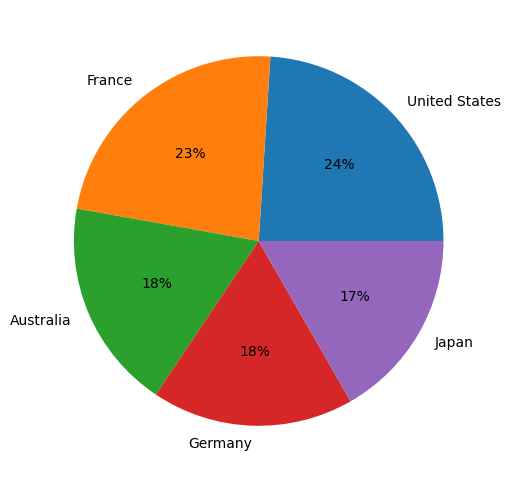

In [48]:
plt.figure(figsize=(8,6))
plt.pie(country_df[:5]['len'], labels=country_df[:5]['country'], autopct='%.0f%%')
plt.show()